In [7]:
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import numpy as np

import torch.nn.functional as F
import torch.nn as nn  
import torch

from es import EvolutionStrategies
from model import GRUNet

random_seed = 42
torch.manual_seed(random_seed)
device = torch.device('mps' if torch.backends.mps.is_available() else 'cuda' if torch.cuda.is_available() else 'cpu')
model = GRUNet(input_size=10, hidden_size=20, output_size=1, num_layers=2).to(device)
es = EvolutionStrategies(model, population_size=50, sigma=0.1, learning_rate=0.03, device=device)
distance_metric = nn.BCEWithLogitsLoss()

# Create random datasets

In [2]:
# Create random datasets
input_size = 10
sequence_length = 5
num_samples = 1000

X_train = torch.randn(num_samples, sequence_length, input_size).to(device)
y_train = torch.randint(0, 2, (num_samples, 1)).float().to(device)

X_test = torch.randn(num_samples, sequence_length, input_size).to(device)
y_test = torch.randint(0, 2, (num_samples, 1)).float().to(device)

print(f"X train shape: {X_train.shape}, y train shape: {y_train.shape}")
print(f"X test shape: {X_test.shape}, y test shape: {y_test.shape}")

X train shape: torch.Size([1000, 5, 10]), y train shape: torch.Size([1000, 1])
X test shape: torch.Size([1000, 5, 10]), y test shape: torch.Size([1000, 1])


# Train and Validation

Smaple input shape: torch.Size([1, 5, 10])
Sample output shape: torch.Size([1, 1])


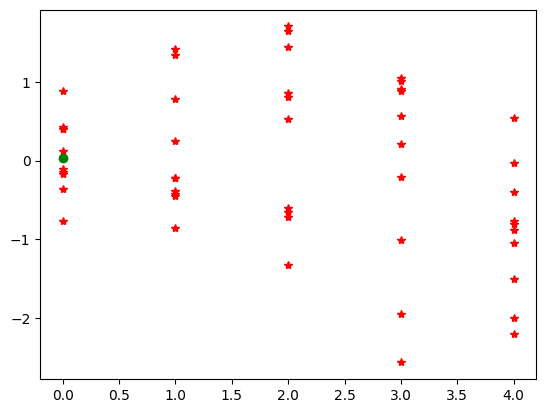

In [3]:
# Initalization and checking
model = GRUNet(input_size=input_size, hidden_size=20, num_layers=2, output_size=1).to(device)
sample_input = torch.randn(1, sequence_length, input_size).to(device)
sample_output = model(sample_input)
print(f"Smaple input shape: {sample_input.shape}")
print(f"Sample output shape: {sample_output.shape}")

plt.plot(sample_input.cpu().numpy().squeeze(), '*', color='r')
plt.plot(sample_output.detach().cpu().numpy().squeeze(), 'o', color='g')
plt.show()

# Train

In [4]:
def get_reward(model):
    model.eval()
    with torch.no_grad():
        idx = torch.randperm(X_train.size(0))
        xb = X_train[idx]
        yb = y_train[idx]
        out = model(xb)
        loss = distance_metric(out, yb)
        return -loss.item()

In [8]:
num_generations = 100
for gen in range(num_generations):
    mean_reward = es.train_step(get_reward)
    print(f"Generation {gen+1}/{num_generations}, Mean Reward: {mean_reward:.4f}")

Generation 1/100, Mean Reward: -14.1286
Generation 2/100, Mean Reward: -253462.2344
Generation 3/100, Mean Reward: -16930598.0000
Generation 4/100, Mean Reward: -99936534528.0000
Generation 5/100, Mean Reward: -355636379648.0000
Generation 6/100, Mean Reward: -2238366089216.0000
Generation 7/100, Mean Reward: -285265620893696.0000
Generation 8/100, Mean Reward: -392817809555456.0000
Generation 9/100, Mean Reward: -9603376148905984.0000
Generation 10/100, Mean Reward: -343134008248369152.0000
Generation 11/100, Mean Reward: -1759480150770057216.0000
Generation 12/100, Mean Reward: -15246474743579148288.0000
Generation 13/100, Mean Reward: -43781783359900876800.0000
Generation 14/100, Mean Reward: -199143071033765920768.0000
Generation 15/100, Mean Reward: -97319779542925335068672.0000
Generation 16/100, Mean Reward: -6780338686942261542912.0000
Generation 17/100, Mean Reward: -5156627049716364802523136.0000
Generation 18/100, Mean Reward: -2671594097952913176395776.0000
Generation 19/10

In [9]:
model.eval()
with torch.no_grad():
    logits = model(X_test)
    preds = (torch.sigmoid(logits) > 0.5).float()
    acc = (preds == y_test).float().mean().item()
print(f"Final accuracy (synthetic data): {acc:.4f}")

Final accuracy (synthetic data): 0.5140
